In [1]:
from keras.datasets import imdb

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [3]:
train_x = vectorize_sequences(train_data)
test_x = vectorize_sequences(test_data)

train_y = np.asarray(train_label).astype('float32')
test_y = np.asarray(test_label).astype('float32')

In [4]:
print(train_x.shape)
print(test_x.shape)

(25000, 10000)
(25000, 10000)


In [5]:
from keras import layers
from keras import models

model_16 = models.Sequential()
model_16.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_16.add(layers.Dense(16, activation='relu'))
model_16.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model_16.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history_16 = model_16.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y))

Epoch 1/20
49/49 [==============================] - 6s 112ms/step - loss: 0.5407 - accuracy: 0.7524 - val_loss: 0.3338 - val_accuracy: 0.8772
Epoch 2/20
49/49 [==============================] - 2s 29ms/step - loss: 0.2643 - accuracy: 0.9099 - val_loss: 0.2823 - val_accuracy: 0.8891
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1972 - accuracy: 0.9325 - val_loss: 0.2854 - val_accuracy: 0.8858
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1614 - accuracy: 0.9433 - val_loss: 0.2954 - val_accuracy: 0.8838
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1364 - accuracy: 0.9549 - val_loss: 0.3232 - val_accuracy: 0.8774
Epoch 6/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1221 - accuracy: 0.9596 - val_loss: 0.3350 - val_accuracy: 0.8762
Epoch 7/20
49/49 [==============================] - 2s 31ms/step - loss: 0.1054 - accuracy: 0.9646 - val_loss: 0.3603 - val_accuracy: 0.8725
Epoch 8/20
4

In [8]:
eval_16 = model_16.evaluate(test_x, test_label)

782/782 [==============================] - 4s 4ms/step - loss: 0.7996 - accuracy: 0.8467


In [9]:
model_4 = models.Sequential()
model_4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model_4.add(layers.Dense(4, activation='relu'))
model_4.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model_4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_4 = model_4.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y))

Epoch 1/20
49/49 [==============================] - 7s 120ms/step - loss: 0.6271 - accuracy: 0.6950 - val_loss: 0.4763 - val_accuracy: 0.8638
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 0.4097 - accuracy: 0.8921 - val_loss: 0.3665 - val_accuracy: 0.8830
Epoch 3/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2993 - accuracy: 0.9162 - val_loss: 0.3220 - val_accuracy: 0.8832
Epoch 4/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2459 - accuracy: 0.9256 - val_loss: 0.2931 - val_accuracy: 0.8898
Epoch 5/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2107 - accuracy: 0.9344 - val_loss: 0.2818 - val_accuracy: 0.8913
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1897 - accuracy: 0.9389 - val_loss: 0.2825 - val_accuracy: 0.8882
Epoch 7/20
49/49 [==============================] - 2s 48ms/step - loss: 0.1631 - accuracy: 0.9493 - val_loss: 0.2877 - val_accuracy: 0.8855
Epoch 8/20
4

In [11]:
eval_4 = model_4.evaluate(test_x, test_label)

782/782 [==============================] - 3s 4ms/step - loss: 0.4593 - accuracy: 0.8641


In [12]:
print(eval_4)
print(eval_16)

[0.45928090810775757, 0.8641200065612793]
[0.7995752096176147, 0.8467199802398682]


In [13]:
import matplotlib.pyplot as plt

h_dict_16 = history_16.history
h_dict_4 = history_4.history

val_loss_16 = h_dict_16['val_loss']
val_loss_4 = h_dict_4['val_loss']

print(val_loss_4)
print(val_loss_16)

[0.47630250453948975, 0.36647194623947144, 0.32203757762908936, 0.2931061387062073, 0.28181082010269165, 0.2824696898460388, 0.2876579165458679, 0.29097241163253784, 0.29629945755004883, 0.3061140179634094, 0.31764087080955505, 0.33542850613594055, 0.34395620226860046, 0.35757577419281006, 0.37345805764198303, 0.3893768787384033, 0.4070911705493927, 0.43097373843193054, 0.438871830701828, 0.4592808187007904]
[0.33379438519477844, 0.28228479623794556, 0.2853665351867676, 0.295352578163147, 0.32324159145355225, 0.33495867252349854, 0.3603392541408539, 0.3931935429573059, 0.4131699502468109, 0.45834842324256897, 0.5000838041305542, 0.5443211793899536, 0.549336850643158, 0.5980854630470276, 0.6010628342628479, 0.6397943496704102, 0.6858369708061218, 0.7281140685081482, 0.8176241517066956, 0.799575686454773]


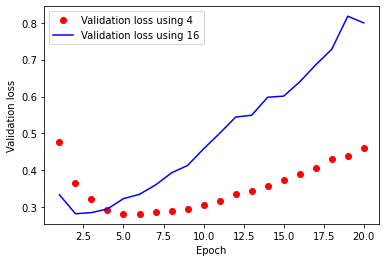

In [14]:
frame = range(1, len(val_loss_16) + 1)

plt.plot(frame, val_loss_4, 'ro', label='Validation loss using 4')
plt.plot(frame, val_loss_16, 'b', label='Validation loss using 16')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [15]:
from keras import regularizers

model_l2 = models.Sequential()
model_l2.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model_l2.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_l2.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model_l2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_l2 = model_l2.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y))

Epoch 1/20
49/49 [==============================] - 10s 147ms/step - loss: 0.5901 - accuracy: 0.7314 - val_loss: 0.3858 - val_accuracy: 0.8696
Epoch 2/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3193 - accuracy: 0.9081 - val_loss: 0.3531 - val_accuracy: 0.8770
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2687 - accuracy: 0.9233 - val_loss: 0.3268 - val_accuracy: 0.8893
Epoch 4/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2370 - accuracy: 0.9340 - val_loss: 0.3573 - val_accuracy: 0.8767
Epoch 5/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2320 - accuracy: 0.9364 - val_loss: 0.3441 - val_accuracy: 0.8844
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2155 - accuracy: 0.9426 - val_loss: 0.3511 - val_accuracy: 0.8792
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2074 - accuracy: 0.9470 - val_loss: 0.3620 - val_accuracy: 0.8774
Epoch 8/20


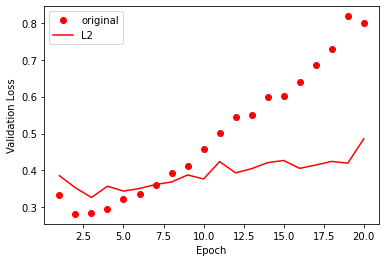

In [17]:
plt.clf()

val_loss_l2 = history_l2.history['val_loss']

plt.plot(frame, val_loss_16, 'ro', label='original')
plt.plot(frame, val_loss_l2, 'r', label='L2')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [18]:
model_dropout = models.Sequential()
model_dropout.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(16, activation='relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(1, activation='sigmoid'))

model_dropout.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model_l2.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y))

Epoch 1/20
49/49 [==============================] - 9s 189ms/step - loss: 0.1820 - accuracy: 0.9535 - val_loss: 0.4557 - val_accuracy: 0.8639
Epoch 2/20
49/49 [==============================] - 3s 54ms/step - loss: 0.1819 - accuracy: 0.9544 - val_loss: 0.4983 - val_accuracy: 0.8476
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1767 - accuracy: 0.9556 - val_loss: 0.4339 - val_accuracy: 0.8670
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1764 - accuracy: 0.9555 - val_loss: 0.4486 - val_accuracy: 0.8626
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1724 - accuracy: 0.9574 - val_loss: 0.4844 - val_accuracy: 0.8598
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1718 - accuracy: 0.9573 - val_loss: 0.4422 - val_accuracy: 0.8669
Epoch 7/20
49/49 [==============================] - 2s 31ms/step - loss: 0.1701 - accuracy: 0.9582 - val_loss: 0.4689 - val_accuracy: 0.8572
Epoch 8/20
4

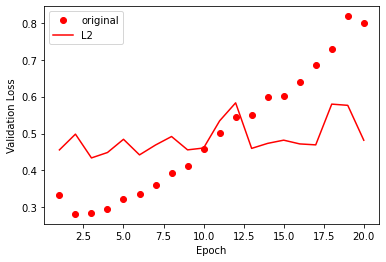

In [19]:
plt.clf()

val_loss_dropout = history_dropout.history['val_loss']

plt.plot(frame, val_loss_16, 'ro', label='original')
plt.plot(frame, val_loss_dropout, 'r', label='dropout')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()